In [166]:


import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import random
import pandas as pd



In [167]:
def ode_demo(y,t,b,g,m):
    """
    Differential equation of a SIR model with equal birth and deathrate.

    Arguments:
    y --
    t -- time index (days)
    b -- beta parameter (infectiousness)
    g -- gamma parameter (recovery rate)
    m -- mu parameter (birth and deathrate)
    """
    s,i,r = y
    dsdt = m - b * s * i - m * s
    didt = b * s * i - g * i - m * i
    drdt = g * i - m * r

    return dsdt, didt, drdt


def SIR_events(S,I,R,p):
    # Death S
    if p == 0:
        S.append(S[-1] - 1 + 1)
        I.append(I[-1])
        R.append(R[-1])

    # Infection
    elif p == 1:
        S.append(S[-1] - 1)
        I.append(I[-1] + 1)
        R.append(R[-1])

    # Death I
    elif p == 2:
        S.append(S[-1] + 1)
        I.append(I[-1] - 1)
        R.append(R[-1])

    # Recovered
    elif p == 3:
        S.append(S[-1])
        I.append(I[-1] - 1)
        R.append(R[-1] + 1)

    # Death R
    elif p == 4:
        S.append(S[-1] + 1)
        I.append(I[-1])
        R.append(R[-1] - 1)

    # Import
    elif p == 5:
        S.append(S[-1] - 1)
        I.append(I[-1] + 1)
        R.append(R[-1])

    return S, I, R


def SIR_demo(n, max_t, beta, gamma, mu):
    S = [0.99*n]
    I = [0.01*n]
    R = [0]
    t = [0]

    while t[-1] < max_t:
        # Set rates
        rates = [mu * S[-1], beta * S[-1] * I[-1] / n,  # rate(S)
                mu * I[-1], gamma * I[-1],  # rate(I)
                mu * R[-1]]  # rate(R)

        rates_sum = sum(rates)
        dt = -1*np.log(np.random.random()) / rates_sum
        t.append(t[-1] + dt)

        rand = np.random.random()

        p = 0
        for i in range(len(rates)):
            if rand * rates_sum < sum(rates[:i+1]):
                p = i
                break

        S, I, R = SIR_events(S,I,R,p)
    return S, I, R, t


def SIR_import(n, max_t, beta, gamma, mu, epsilon):
    S = [n]
    I = [0]
    R = [0]
    t = [0]
    extinctions = 0

    while t[-1] < max_t:
        # Set rates
        rates = [mu * S[-1], beta * S[-1] * I[-1] / n,  # rate(S)
                mu * I[-1], gamma * I[-1],  # rate(I)
                mu * R[-1],  # rate(R)
                epsilon * S[-1]] # Import

        rates_sum = sum(rates)
        dt = -1*np.log(np.random.random()) / rates_sum
        t.append(t[-1] + dt)

        rand = np.random.random()

        p = 0
        for i in range(len(rates)):
            if rand * rates_sum < sum(rates[:i+1]):
                p = i
                break

        S, I, R = SIR_events(S,I,R,p)
    return S, I, R, t, extinctions

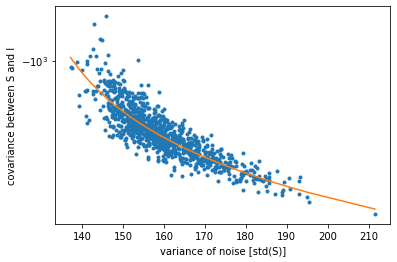

In [168]:

beta = 2
gamma = 0.5
mu = 0.1
population = 1000
max_t = 60
epsilon = 5.5 * 10 ** (-5) * np.sqrt(population)
covlist= []
noiselist = []


for i in range(1000):
    S, I, R, T, Ext = SIR_import(population, max_t, beta, gamma, mu, epsilon)
    cov = np.cov(S, I)[0, 1]
    covlist.append(cov)
    noise = np.std(S)
    noiselist.append(noise)


m, b = np.polyfit(noiselist, covlist, 1)  # fit line through data

x = np.sort(np.array(noiselist))

plt.figure()
plt.plot(noiselist, covlist, '.')
plt.plot(x, m*x+b)
#plt.xscale('symlog')
plt.yscale('symlog', linthresh=0.01)
#plt.ylim(np.min(covlist)*1.5, 0)
plt.xlabel('variance of noise [std(S)]')
plt.ylabel('covariance between S and I')
plt.show()
